# This is a the Test Simulation for MWM Galactic Genesis Targets

In [1]:
import numpy as np
from matplotlib import pyplot as plt
from astropy.table import Table,vstack
from targetlib import testfield_gal,testfield_fk5,testfield_ecl
from astropy.coordinates import SkyCoord
from astropy.coordinates import Galactic,FK5,BarycentricTrueEcliptic
import astropy.units as u
%matplotlib inline

## New in Gamma-0
- No changes between beta-0 and gamma-0

## Read in Target and Cadence Tables

In [2]:
ver = 'gamma-0'
gg_tab = Table.read('workspace/target_files/GG/{}/GG_downsample.csv'.format(ver))
gg_tab

ra,dec
float64,float64
296.254,35.4756
262.151,-29.8483
289.735,14.1693
245.38,-50.2734
37.17750000000001,66.6958
283.632,-2.73066
94.05160000000001,22.7421
218.244,-52.7626
122.46600000000001,-0.033815


/home/deleenm/Dropbox/Research/notebooks/SDSS-V SimTargets/allsky/targetlib.py:148: MatplotlibDeprecationWarning: 
The dedent function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use inspect.cleandoc instead.
  bmap = Basemap(projection='moll', lon_0=180,lat_0=0)
/usr/local/lib/student/anaconda3/lib/python3.7/site-packages/IPython/core/pylabtools.py:132: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


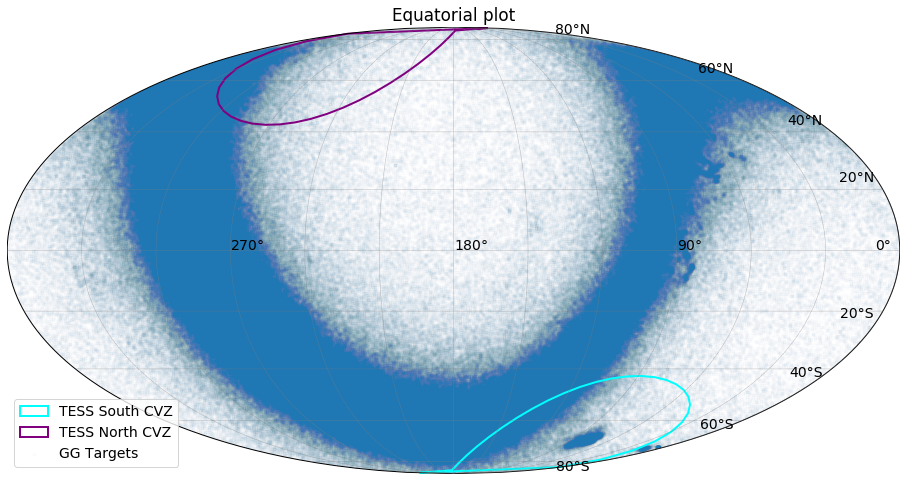

In [3]:
plt.rcParams.update({'font.size': 14})
(fig,bmap) = testfield_fk5()
#Plot GG Targets
ggx,ggy = bmap(gg_tab['ra'],gg_tab['dec'])
bmap.scatter(ggx,ggy,marker='.',label='GG Targets',alpha=0.01)
plt.title("Equatorial plot")
plt.legend()
plt.show()

/home/deleenm/Dropbox/Research/notebooks/SDSS-V SimTargets/allsky/targetlib.py:206: MatplotlibDeprecationWarning: 
The dedent function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use inspect.cleandoc instead.
  bmap = Basemap(projection='moll', lon_0=185,lat_0=0)


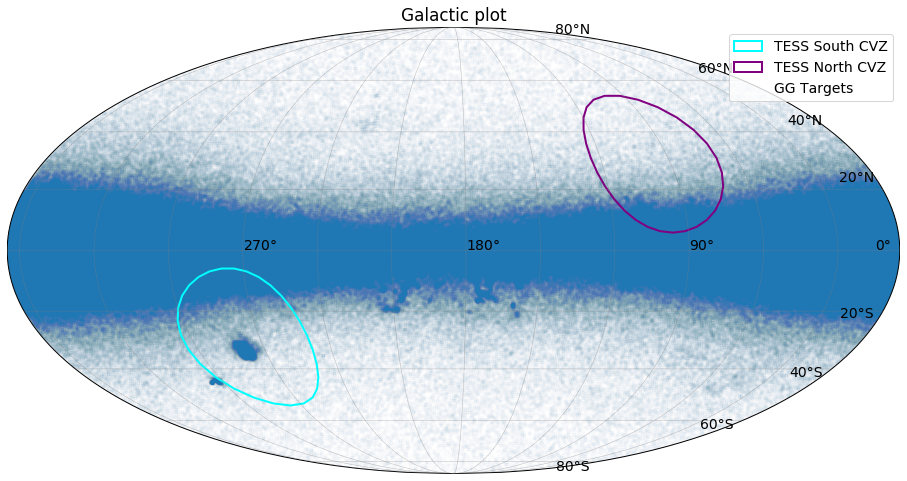

In [4]:
plt.rcParams.update({'font.size': 14})
(fig,bmap) = testfield_gal()
gg_coord_fk5 = SkyCoord(gg_tab['ra'],gg_tab['dec'],unit=(u.deg,u.deg),frame="fk5")
gg_coord_gal = gg_coord_fk5.transform_to(Galactic())
ggx,ggy = bmap(gg_coord_gal.l,gg_coord_gal.b)
bmap.scatter(ggx,ggy,marker='.',label='GG Targets',alpha=0.01)
plt.title("Galactic plot")
plt.legend()
plt.show()

## Creating Target Table

In [5]:
target_tab = Table()

In [6]:
#Combine GG and Dust targets
target_tab['ra'] = gg_tab['ra']
target_tab['dec'] = gg_tab['dec']
target_tab['cadence'] = np.repeat('mwm_galactic_1x1',len(gg_tab))
target_tab['type'] = np.repeat('mwm_galactic',len(gg_tab))
target_tab['priority'] = np.repeat(np.array(75,dtype='int32'),len(gg_tab))
target_tab['value'] = np.repeat(np.array(1.0,dtype='float32'),len(gg_tab))

In [7]:
target_tab

ra,dec,cadence,type,priority,value
float64,float64,str16,str12,int32,float32
296.254,35.4756,mwm_galactic_1x1,mwm_galactic,75,1.0
262.151,-29.8483,mwm_galactic_1x1,mwm_galactic,75,1.0
289.735,14.1693,mwm_galactic_1x1,mwm_galactic,75,1.0
245.38,-50.2734,mwm_galactic_1x1,mwm_galactic,75,1.0
37.17750000000001,66.6958,mwm_galactic_1x1,mwm_galactic,75,1.0
283.632,-2.73066,mwm_galactic_1x1,mwm_galactic,75,1.0
94.05160000000001,22.7421,mwm_galactic_1x1,mwm_galactic,75,1.0
218.244,-52.7626,mwm_galactic_1x1,mwm_galactic,75,1.0
122.46600000000001,-0.033815,mwm_galactic_1x1,mwm_galactic,75,1.0


In [8]:
target_tab.write('{}/mwm_galactic_target_{}.fits'.format(ver,ver),overwrite=True)

## Update Cadence Table

In [9]:
cadence_tab = Table()

In [10]:
cadence_tab['cadence'] = ['mwm_galactic_1x1']
cadence_tab['nepochs'] = np.array([1],dtype='int32')
cadence_tab['delta'] = np.array([[0.0]],dtype='float32')
cadence_tab['delta_min'] = np.array([[0.0]],dtype='float32')
cadence_tab['delta_max'] = np.array([[0.0]],dtype='float32')
cadence_tab['lunation'] = np.array([[1.0]],dtype='float32')
cadence_tab['instrument'] = np.array([['apogee']],dtype='str')

In [11]:
cadence_tab

cadence,nepochs,delta [1],delta_min [1],delta_max [1],lunation [1],instrument [1]
str16,int32,float32,float32,float32,float32,str6
mwm_galactic_1x1,1,0.0,0.0,0.0,1.0,apogee


In [12]:
cadence_tab.write('{}/mwm_galactic_cadence_{}.fits'.format(ver,ver),overwrite=True)

In [13]:
test =  Table.read('{}/mwm_galactic_cadence_{}.fits'.format(ver,ver))
test

cadence,nepochs,delta,delta_min,delta_max,lunation,instrument [1]
bytes16,int32,float32,float32,float32,float32,bytes24
mwm_galactic_1x1,1,0.0,0.0,0.0,1.0,apogee
